# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

In [52]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set plot styling
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline
#%matplotlib notebook




## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [53]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [54]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [55]:
# Aggregate data by year (e.g., sum, average, etc.)
# Here, we're using mean, but you can change it to sum, median etc.
df_aggregated = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Filter the data to span exactly 124 years 
df_aggregated = df_aggregated[(df_aggregated['Year'] >= 1900) & (df_aggregated['Year'] <= 2023)]

#Check that the data contains 124 years
print(df_aggregated)


     Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0    1900                        14.506663               350.373405   
1    1901                        14.485343               349.757140   
2    1902                        14.476262               349.299686   
3    1903                        14.492360               349.644375   
4    1904                        14.494241               349.537032   
..    ...                              ...                      ...   
119  2019                        14.500105               348.642249   
120  2020                        14.496937               350.021731   
121  2021                        14.501424               350.150302   
122  2022                        14.495233               350.493023   
123  2023                        14.474559               351.003294   

     Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0             150.408288                       8.978659  
1             150.548828       

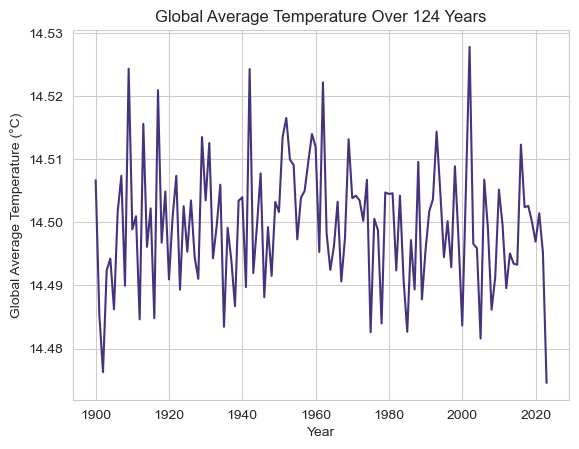

In [56]:
# Visualize one of the time series, like Global Average Temperature

plt.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'])
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Average Temperature Over 124 Years')
#plt.grid(True)
plt.show()

## 2. Univariate Analysis

In univariate analysis we analyze each climate variable independently.

For univariate analysis of climate variables and get insightful information from the data we have created following plots

- Histogram with KDE to view frequency distribution of each variables and for smooth estimation of probability density of data
- Box plot to show potential outliers and visualize central tendancies of data
- Line plot (Time series plot) to view trends over time
- Rug Plot to complement other plots by showing the location of individual observations in an unobtrusive way
- Violin plot for comparison of distribution of data over number of levels of one or more categorical variable
- ECDF plot to represents the proportion or count of observations falling below each unique value in a dataset

In [57]:
#list columns to analyze
analysis_columns = list(df.columns.difference(['Year']))

print(analysis_columns)

# Descriptive Statistics
print("\nDescriptive Statistics:")
stats = df[analysis_columns].describe().T
stats["Range"] = stats["max"] - stats["min"]
print(stats)



['Arctic Ice Area (million km²)', 'CO2 Concentration (ppm)', 'Global Average Temperature (°C)', 'Sea Level Rise (mm)']

Descriptive Statistics:
                                     count        mean        std    min  \
Arctic Ice Area (million km²)    1048576.0    9.000896   3.462551    3.0   
CO2 Concentration (ppm)          1048576.0  350.028018  40.424093  280.0   
Global Average Temperature (°C)  1048576.0   14.499538   0.866101   13.0   
Sea Level Rise (mm)              1048576.0  149.990004  86.576589    0.0   

                                    25%     50%     75%    max  Range  
Arctic Ice Area (million km²)      6.00    9.00   12.00   15.0   12.0  
CO2 Concentration (ppm)          314.99  350.07  385.02  420.0  140.0  
Global Average Temperature (°C)   13.75   14.50   15.25   16.0    3.0  
Sea Level Rise (mm)               74.97  150.02  224.93  300.0  300.0  


Univariate Analysis for Arctic Ice Area (million km²) 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


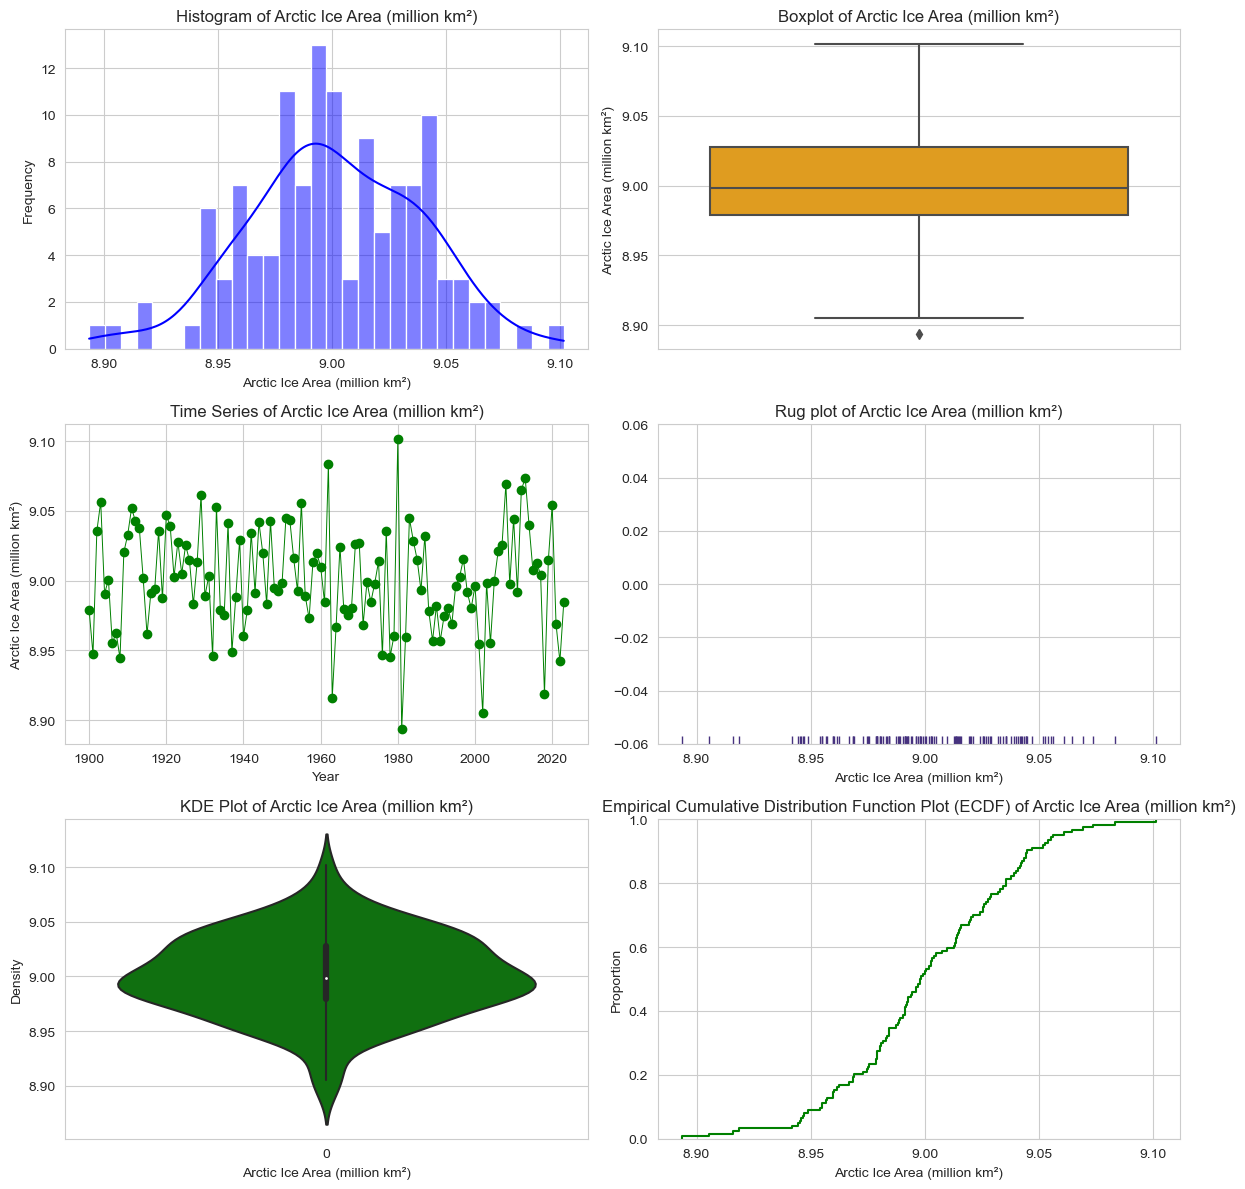

Univariate Analysis for CO2 Concentration (ppm) 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


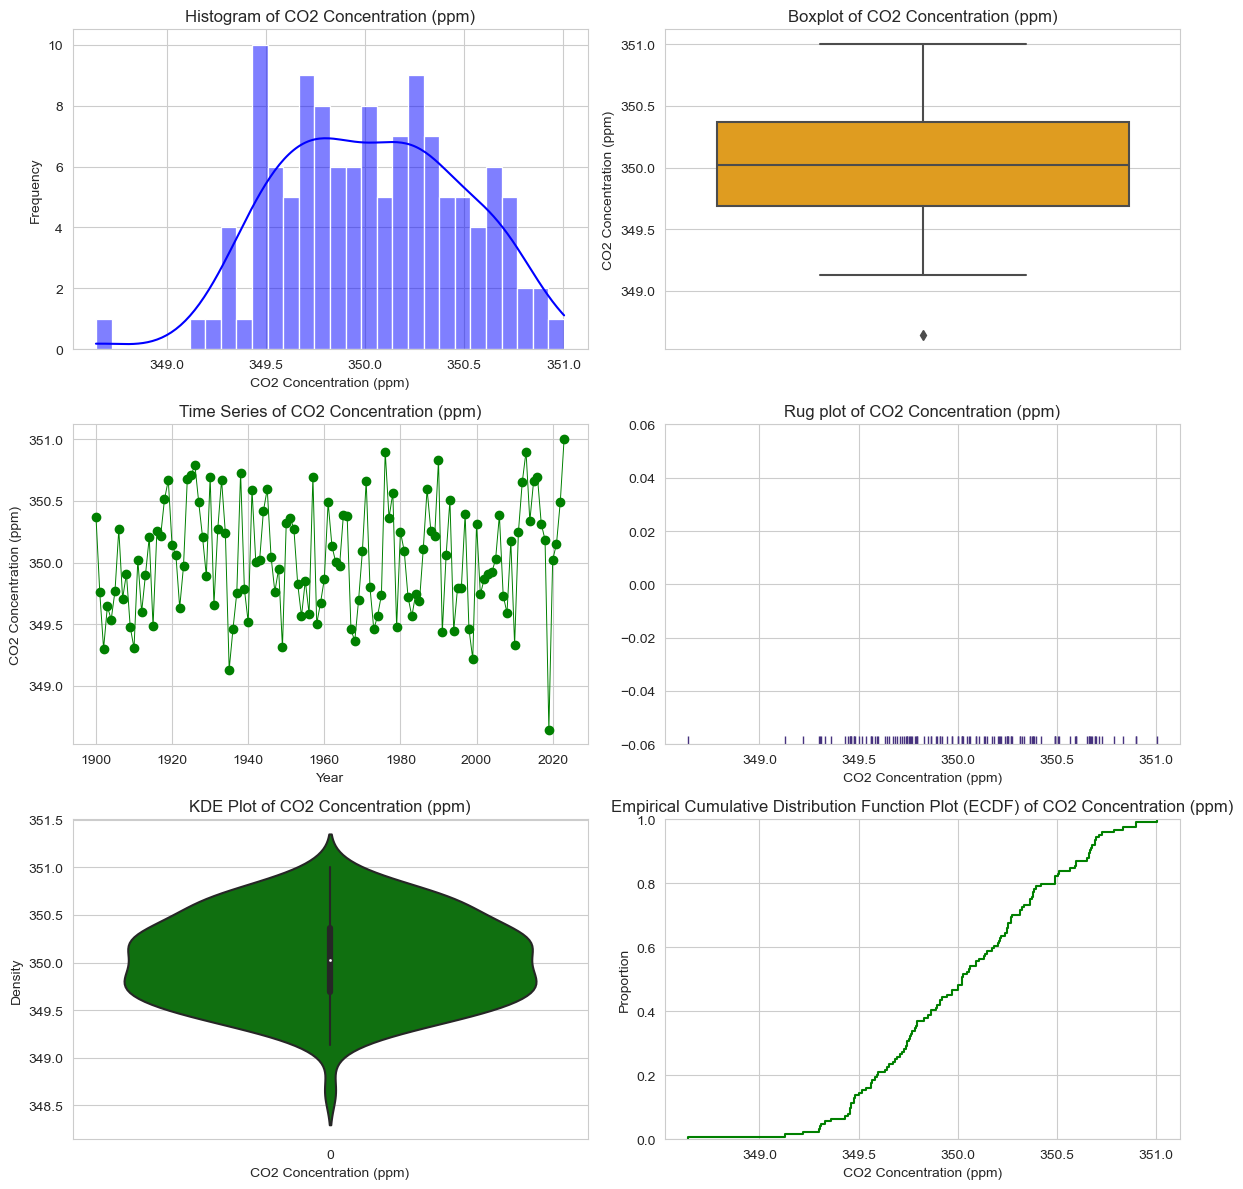

Univariate Analysis for Global Average Temperature (°C) 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


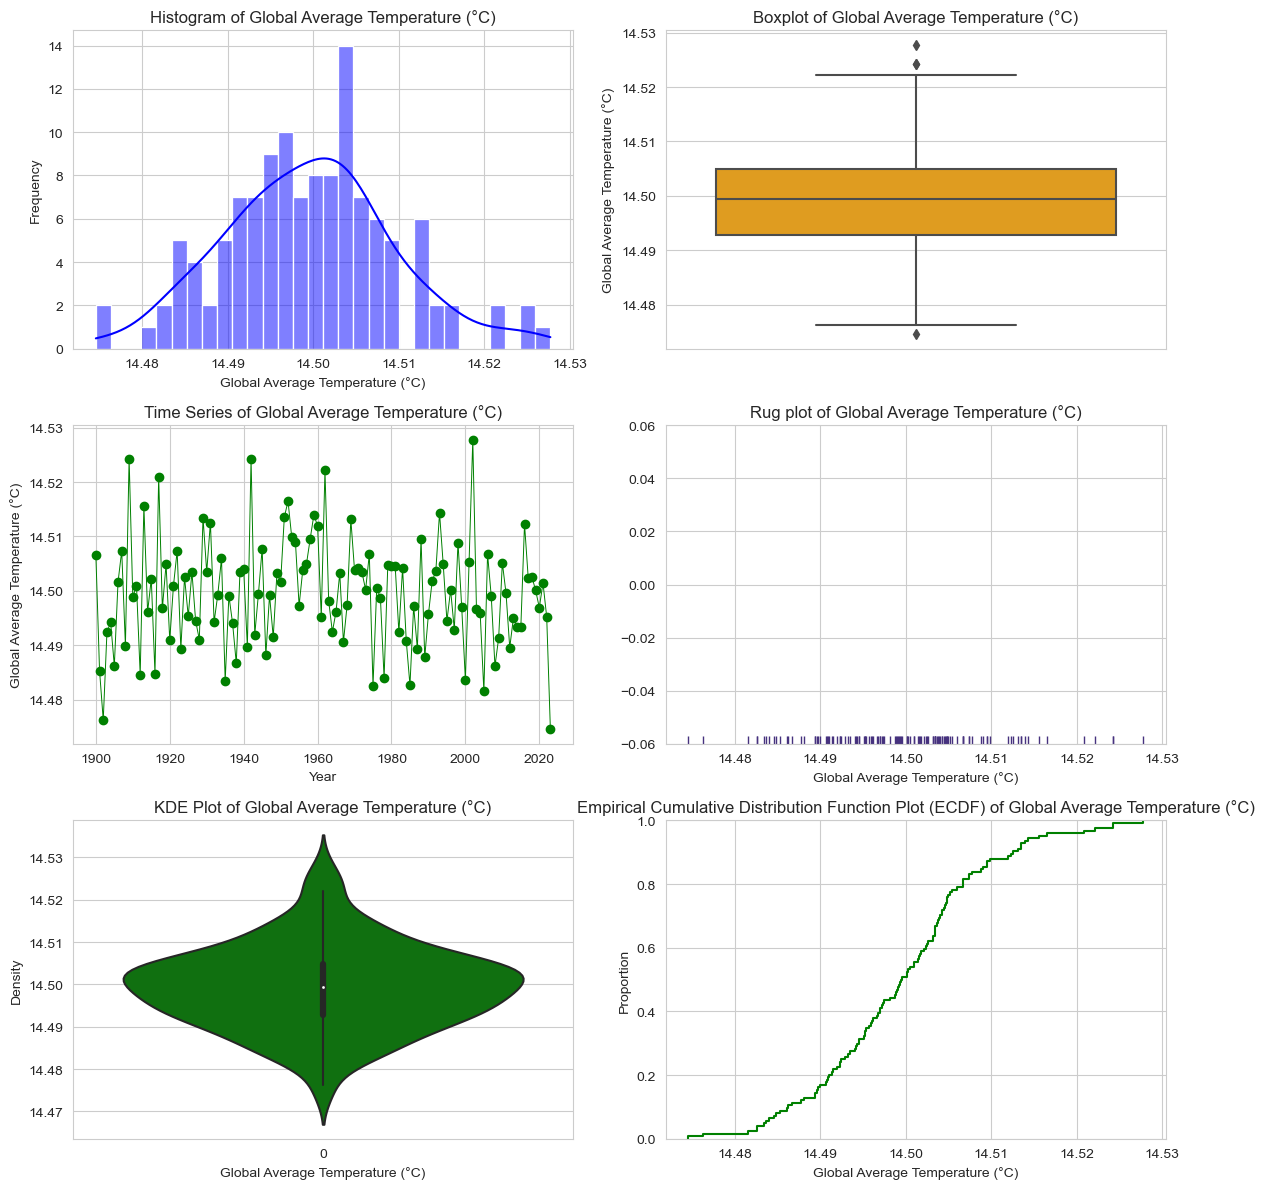

Univariate Analysis for Sea Level Rise (mm) 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


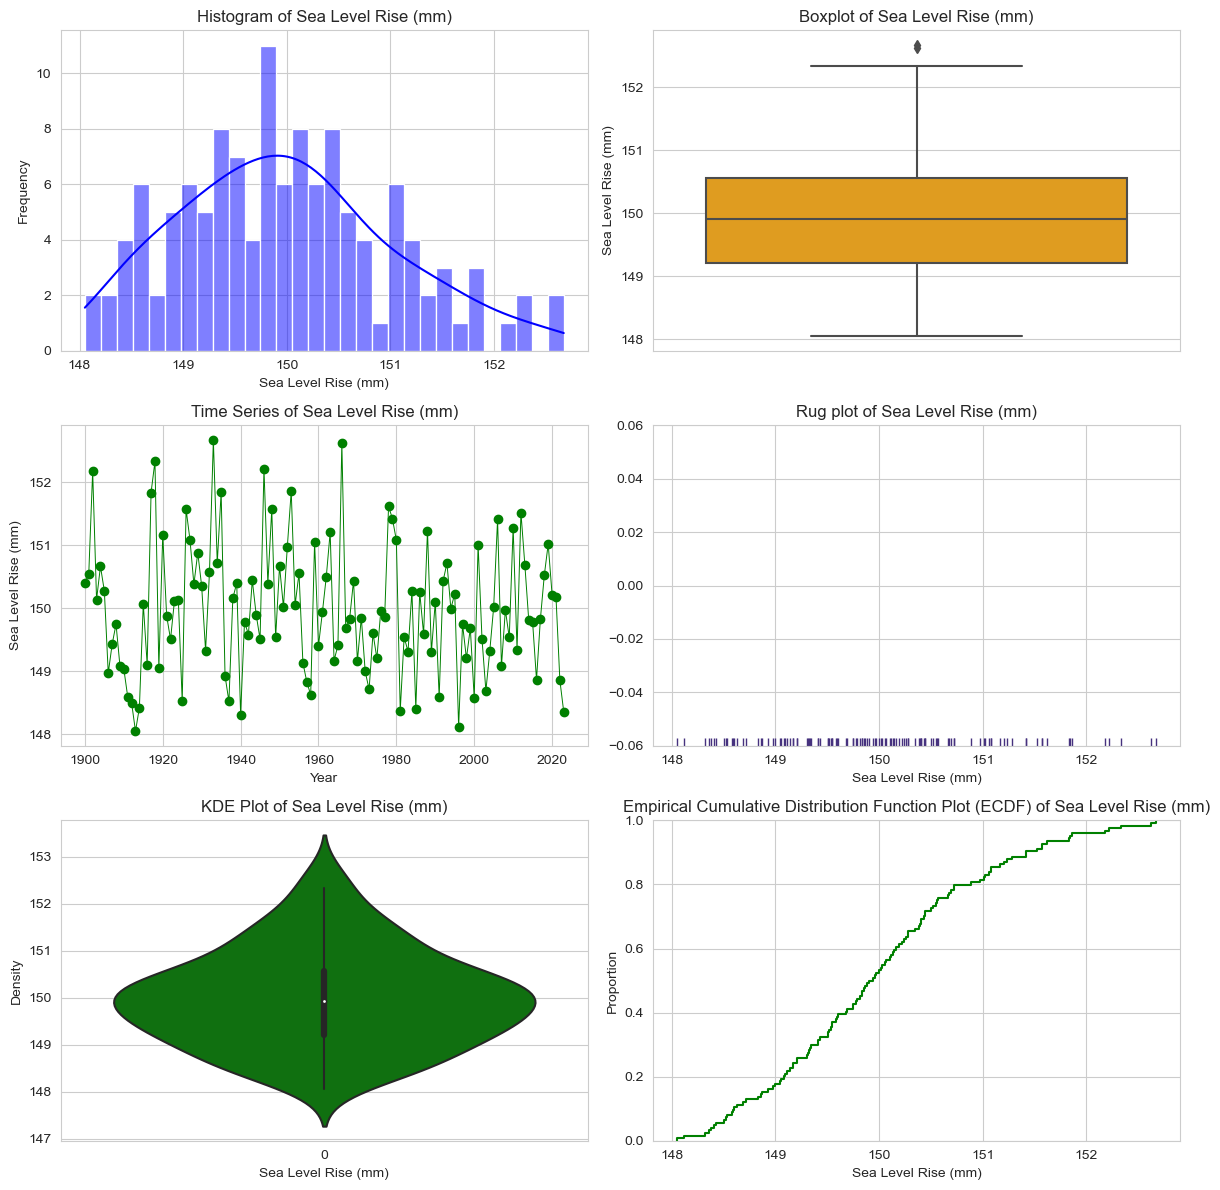

In [58]:
# Visualizations
def univariate_analysis(df, variables):
    for variable in variables:
        print(f"Univariate Analysis for {variable} ")
        print(df[variable].describe())
        print("Creating Univariate plots ...")

        plt.figure(figsize=(12, 12))
        
        # Histogram
        plt.subplot(3, 2, 1)
        sns.histplot(df[variable], kde=True, color='blue', bins=30)
        plt.title(f"Histogram of {variable}")
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        
        # Box Plot
        plt.subplot(3, 2, 2)
        sns.boxplot(y=df[variable], color='orange')
        plt.title(f"Boxplot of {variable}")
        plt.ylabel(variable)
        
        # Time Series Plot
        plt.subplot(3, 2, 3)
        plt.plot(df['Year'], df[variable], marker='o', color='green', linewidth=0.7)
        plt.title(f"Time Series of {variable}")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        
        # Rug Plot
        plt.subplot(3, 2, 4)
        sns.rugplot(df[variable],)
        plt.title(f"Rug plot of {variable}")
        plt.xlabel(variable)
        plt.grid(True)


        # Violin Plot
        plt.subplot(3, 2, 5)
        sns.violinplot(df[variable],color='green')
        plt.title(f'KDE Plot of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Density')

        # ECDF plot
        plt.subplot(3, 2, 6)
        sns.ecdfplot(df[variable], color='green')
        plt.title(f'Empirical Cumulative Distribution Function Plot (ECDF) of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Proportion')
        
        # Display plots
        plt.tight_layout()
        plt.show()


univariate_analysis(df_aggregated, analysis_columns)

## Insights and conclusion drawn from Univariate Analysis

- **Arctic Ice Area (million km²)**
    - The histogram plot shows that the Arctic Ice Area appears to have approximately normally distributed with slight skew, KDE plot further confirms this with most value fall between 8.95 to 9.05 million  km², which is justified by ECDF plot with majority of reading concentrated between 8.95 and 9.05 million km².
    - Looking at the box plot it can be said that there might be potential outliers at the bottom side which could represent significantly reduced Arctic Ice Area on the other hand the interquartile range suggest that most of the data are tightly clustered.
    - Time series plot shows that the Artic Ice Area have fluctuations over time with out any periodic patterns. 
    - Overall the plot for Arctic Ice Area (million km²) showed relatively stable trends without major fluctuations
    
- **CO2 Concentration (ppm)**
    - The histogram plot shows approximately symmetric disribution with most values clustered between 349.5 and 350.5 with peak
    density near 350.0 ppm.
    - The box plot indicates that majority of the CO2 concentrations lie within a tight range with no extreme variability but 
        there seems potential outlier below 349.0 ppm which may represent an anomalous year or the dataset error.
    - The time series plot shows increasing trend of CO2 concentration especially in recent years this could be due to increased 
    industrilization and increased carbon emissions
    - The ECDF plot shows that larger proportion of CO2 concentration values are clustered in the middle range between 349.5 to      350.5 ppm.
    
- **Global Average Temperature (°C)**
    - The histogram shows slightly right-skewed distribution of global average temperature mostly clustered between 14.49°C to 
      14.51°C.
    - The boxplot highlights present of some outliers above 14.52°C and below 14.48°C with most data concentrated with in narrow 
    interquartile range indicating low variability.
    - Time series plot shows there noticiable fluctuations over time having spikes and drops on some years.
    - The ECDF plot shows a steady increase, indicating a relatively uniform spread of temperature values within the observed range.
    
- **Sea Level Rise (mm)**
    - The histogram suggest nearly normal distribution centered around 150 mm which also confirms by KDE plot.
    - The box plot shows one outlier above 152 mm, further the box plot shows narrow interquartile range showing low variability
    - Time series plot shows noticeable year-to-year fluctuations with overall gradual increase in the sea level.
    - The ECDF plot demonstrates a gradual increase in cumulative probability, indicating a fairly uniform spread of sea level rise values within the observed range.

## 3. Bivariate Analysis

In Bivariate Analysis we analyze and explore pairs of variables with each other to get insights into their dependences

For bivariate analysis of climate variables and get insightful information from the data we have created following plots

- Line Plots




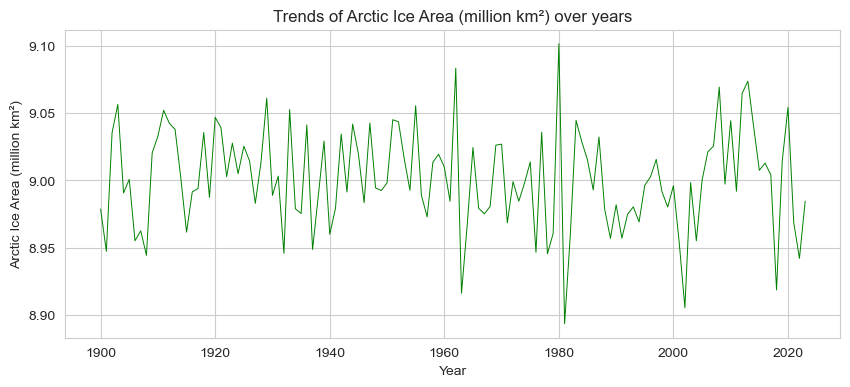

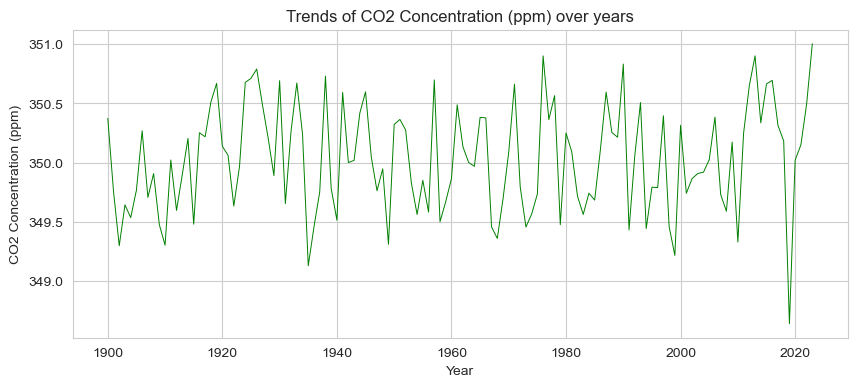

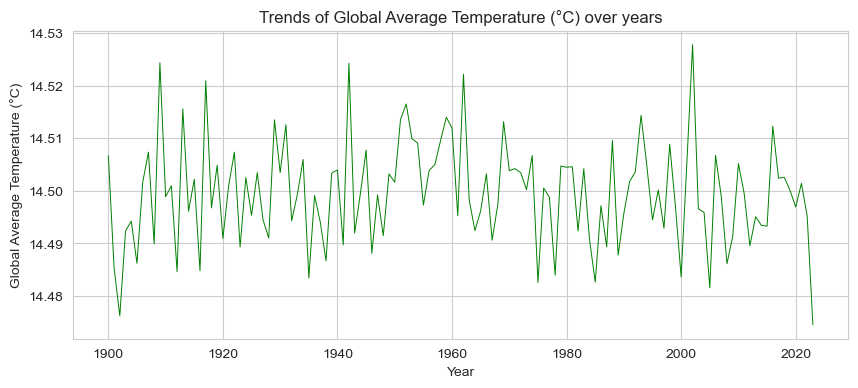

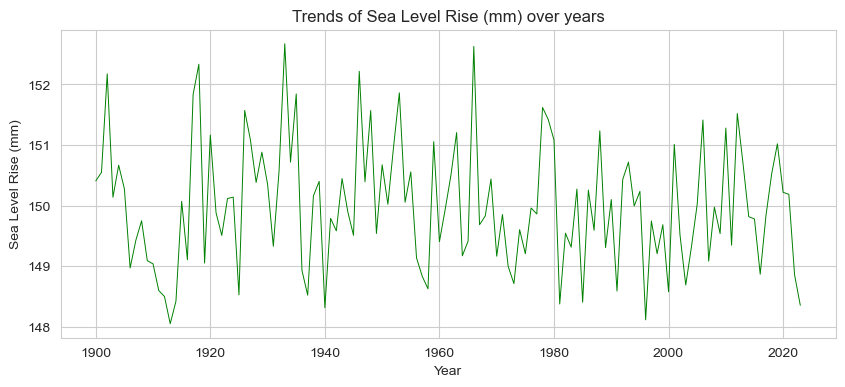

In [59]:
# Visualizations
def bivariate_analysis_lineplot(df, variables):
    for variable in variables:
        plt.figure(figsize=(10, 4))
        
        plt.plot(df['Year'], df[variable], color='green', linewidth=0.7)
        plt.title(f"Trends of {variable} over years")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        plt.show()
        
bivariate_analysis_lineplot(df_aggregated, analysis_columns)




### Analysis of Climate variables over time
- **Arctic Ice Area (million km²)**
     - Line plot shows that the Artic Ice Area have fluctuations over time with out any periodic patterns. 
      
- **CO2 Concentration (ppm)**
    - Line plot shows increasing trend of CO2 concentration especially in recent years this could be due to increased 
    industrilization and increased carbon emissions
    
- **Global Average Temperature (°C)**
    - Line plot shows there noticiable fluctuations over time having spikes and drops on some years.
    
- **Sea Level Rise (mm)**
    - Line plot shows noticeable year-to-year fluctuations with overall gradual increase in the sea level.

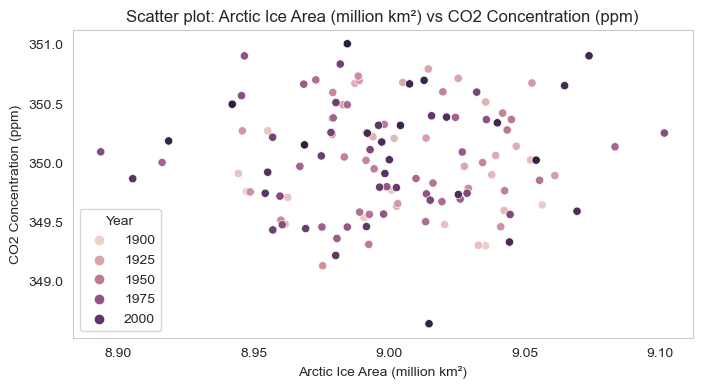

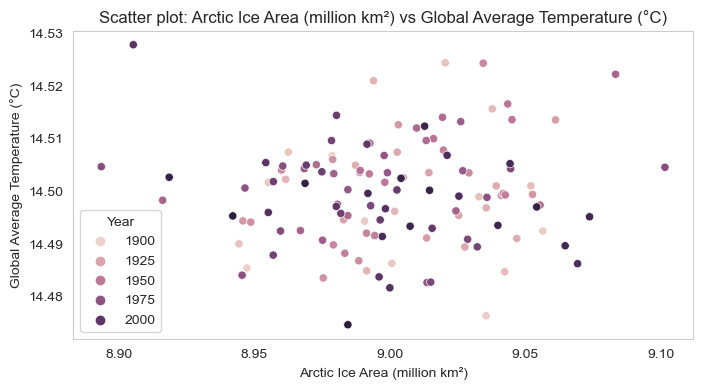

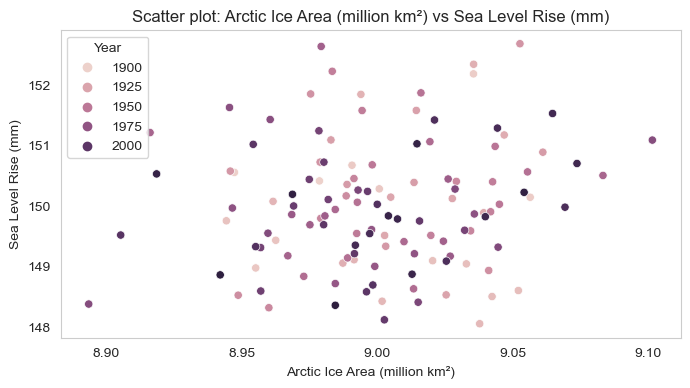

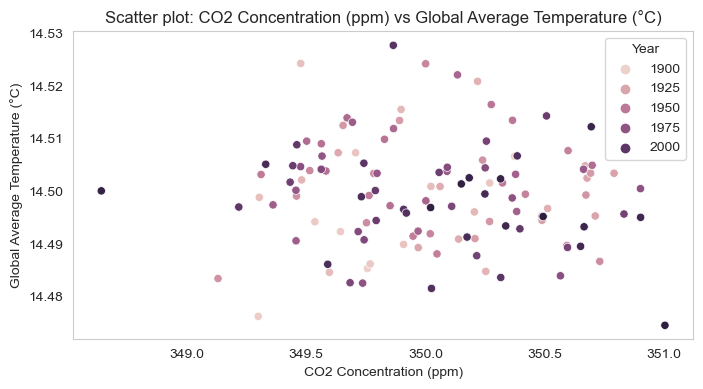

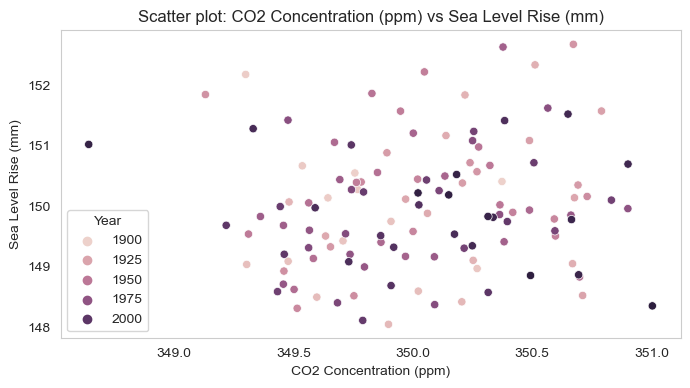

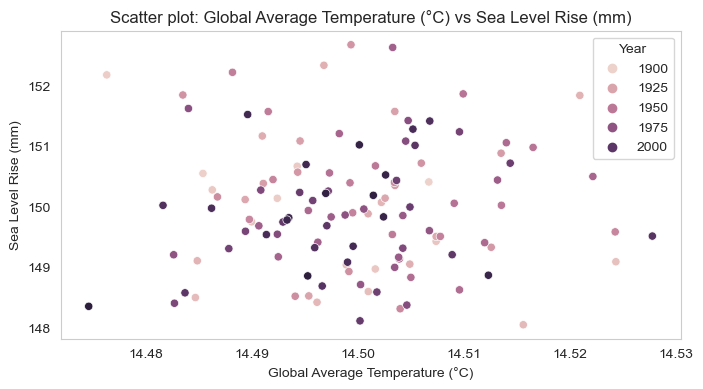

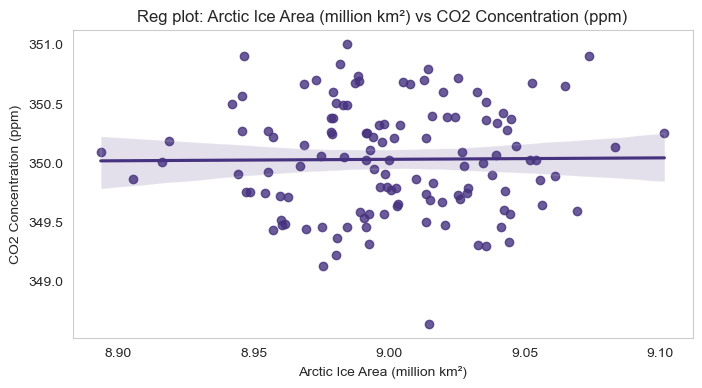

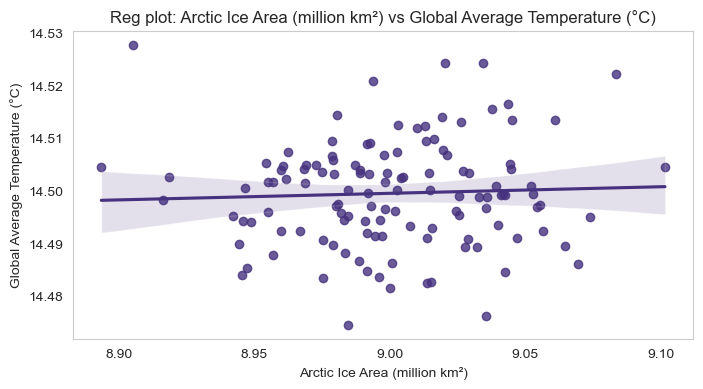

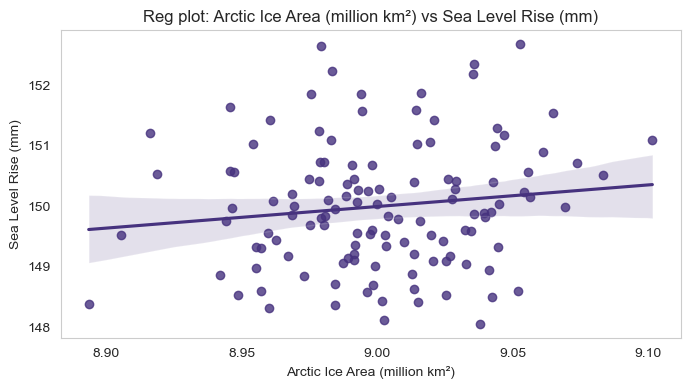

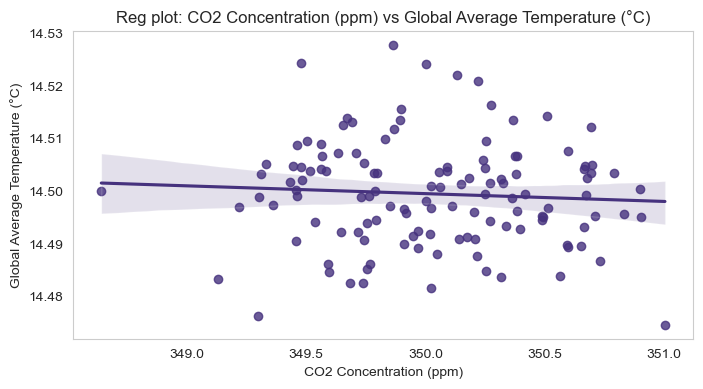

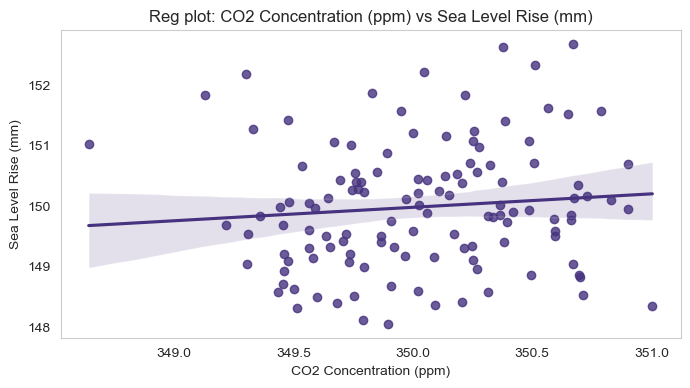

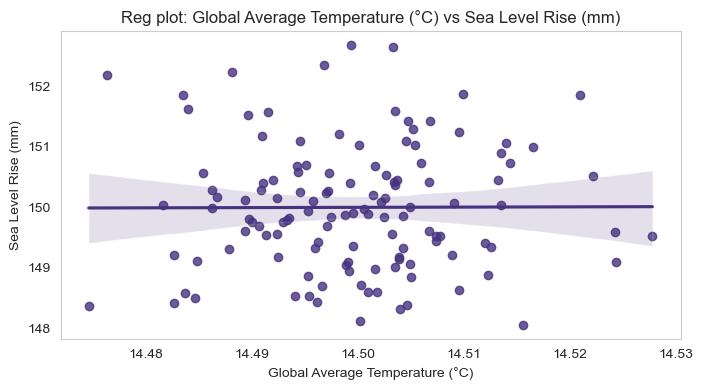

In [60]:
def bivariate_analysis2(df, variables):
    
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=variables[i], y=variables[j], data=df, hue='Year')
            plt.title(f"Scatter plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.regplot(x=variables[i], y=variables[j], data=df)
            plt.title(f"Reg plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

bivariate_analysis2(df_aggregated, analysis_columns)

## Insights and conclusions drawn from Bivariate Analysis
- Arctic Ice Area vs. CO2 Concentration
    - The data points appear relatively scattered, suggesting no direct, simple relationship between CO2 levels and ice area at this scale.
- Arctic Ice Area vs. Global Average Temperature
    - As time progresses (lighter to darker points), global average temperature slightly increases, but the scatter remains widespread
    - While there might be a subtle trend of declining Arctic Ice Area with increasing temperature, it is not pronounced in this dataset.

- Arctic Ice Area vs. Sea Level Rise
    - No obvious temporal pattern emerges when examining the year color-coding
    - The data suggests that during this period, Arctic ice area and sea level rise may have been influenced by different factors or operated somewhat independently
- CO2 Concentration vs. Global Average Temperature
    - The relationship between CO2 concentration and global average temperature shows no strong linear correlation
    - Points from different time periods (1900-2000) are intermixed throughout the plot
    - This suggests that during this specific time period and within these narrow measurement ranges, other factors may have had more immediate influence on global temperature than CO2 levels alone

- CO2 Concentration vs. Sea Level Rise
    - The scatter plot shows a diffuse pattern with no clear relationship between CO2 levels and sea level rise
    - Data points from different decades appear distributed throughout the plot without clear temporal grouping
    - The lack of correlation suggests that sea level variation during this period may have been influenced by multiple complex factors beyond atmospheric CO2 concentration alone
- Global Average Temperature vs. Sea Level Rise
    - The relationship between global average temperature and sea level rise shows a scattered distribution
    - No strong linear trend is visible, suggesting a complex relationship
    - Different time periods (1900-2000) appear distributed throughout the plot
    - This indicates that during this period, the direct relationship between global temperature and sea level was not strongly linear or immediate
    

Correlation Coefficients:

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Sea Level Rise (mm)                                     0.003878   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Sea Level Rise (mm)            

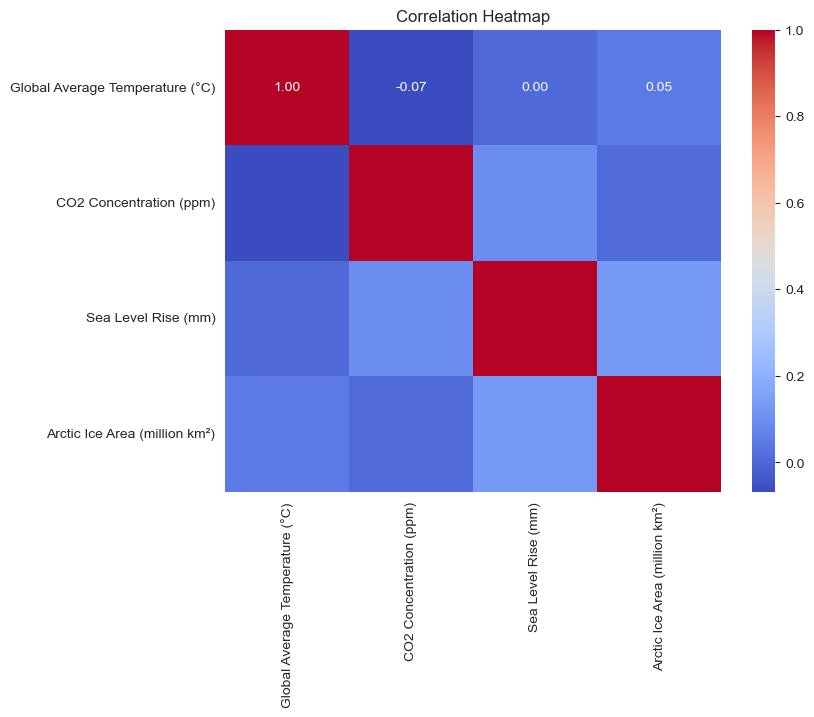

Pair plot for all variable relationships


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

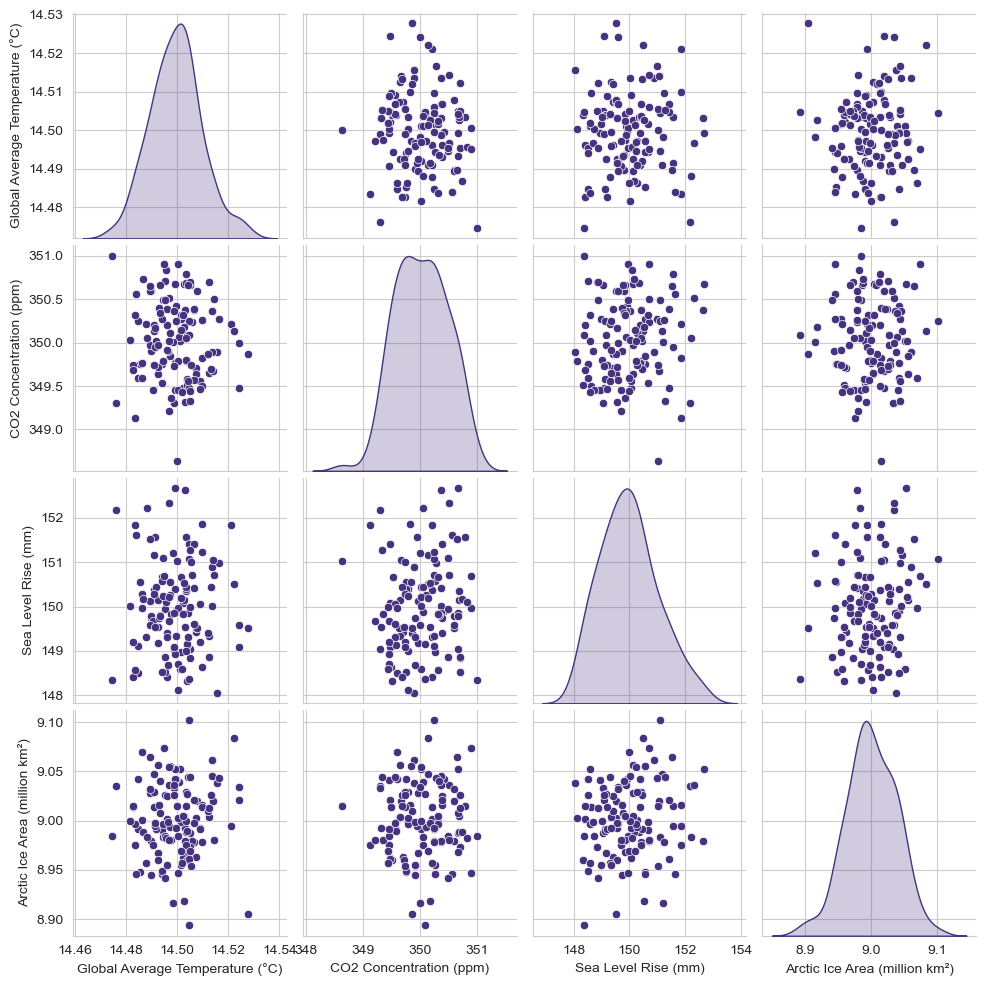

In [61]:
df_heatmap = df_aggregated.drop(columns=['Year'], errors="ignore")

# Correlation coefficients
correlation_matrix = df_heatmap.corr()
print("Correlation Coefficients:\n")
print(correlation_matrix)


# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print('Pair plot for all variable relationships')
# Pair plot for all variable relationships
sns.pairplot(df_heatmap, diag_kind='kde')
plt.show()




## Insights from Climate Variable Correlations

The correlation heatmap shows virtually no meaningful linear relationships between global temperature, CO2 concentration, sea level rise, and Arctic ice area.
Global temperature shows minimal correlation with CO2 (-0.07), sea level (0.00), and Arctic ice area (0.05).
These near-zero correlation values confirm the scattered patterns observed in the previous scatter plots.
During this specific time period, these climate variables appear to be operating independently of each other.
This suggests either more complex non-linear relationships, time-lagged effects, or the need to consider additional variables to understand climate system connections.

## Insights from Pair Plot of all variables
The diagonal shows distribution curves for each variable, revealing their respective normal distributions, while the off-diagonal cells contain scatter plots depicting relationships between each pair of variables. Consistent with the earlier correlation heatmap, the scatter plots reveal predominantly random point distributions without clear linear patterns, confirming the weak correlations previously identified. Each variable's distribution appears approximately normal, with Global Average Temperature centered around 14.50°C, CO2 Concentration around 350 ppm, Sea Level Rise around 150 mm, and Arctic Ice Area around 9.0 million km². This visualization effectively demonstrates that within this dataset, these climate variables show minimal direct linear relationships with each other, suggesting more complex interactions or the need for additional factors to explain their behaviors.